In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
# and of course the actual regression (machine learning) module
from sklearn.linear_model import LinearRegression

In [3]:
raw_data = pd.read_csv("Fish.csv")
raw_data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [4]:
list(set(raw_data.Species))
list(raw_data['Species'].unique())

['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt']

In [5]:
raw_data['Species'] = raw_data['Species'].map({'Bream': 0, 'Roach': 1,'Whitefish':2,'Parkki':3,'Perch':4,'Pike':5,'Smelt':6})
raw_data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,6,12.2,11.5,12.2,13.4,2.0904,1.3936
155,6,13.4,11.7,12.4,13.5,2.4300,1.2690
156,6,12.2,12.1,13.0,13.8,2.2770,1.2558
157,6,19.7,13.2,14.3,15.2,2.8728,2.0672


<AxesSubplot:xlabel='Length1'>

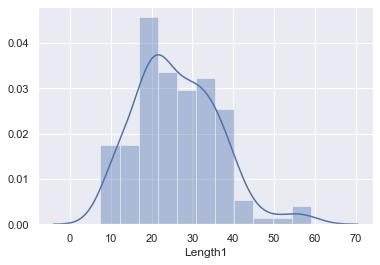

In [6]:
sns.distplot(raw_data["Length1"])

<AxesSubplot:xlabel='Length1'>

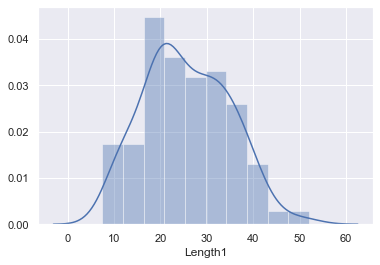

In [7]:
q = raw_data['Length1'].quantile(0.99)
data_1 = raw_data[ raw_data['Length1']<q]
sns.distplot(data_1["Length1"])

<AxesSubplot:xlabel='Length2'>

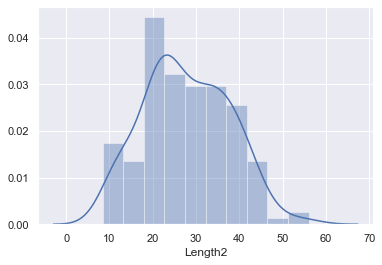

In [8]:
sns.distplot(data_1["Length2"])

<AxesSubplot:xlabel='Length2'>

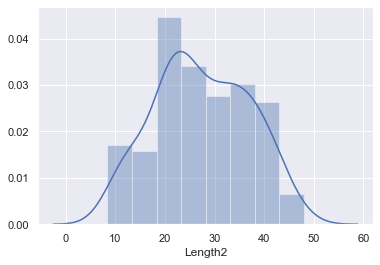

In [9]:
q = data_1['Length2'].quantile(0.99)
data_2 = data_1[data_1['Length2']<q]
sns.distplot(data_2["Length2"])

<AxesSubplot:xlabel='Length3'>

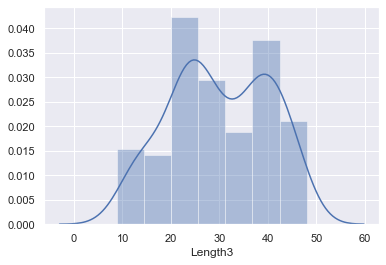

In [10]:
q = data_2['Length3'].quantile(0.99)
data_3 = data_2[data_2['Length3']<q]
sns.distplot(data_3["Length3"])

<AxesSubplot:xlabel='Height'>

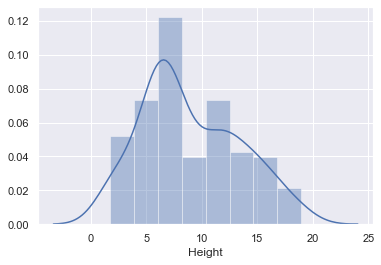

In [11]:
sns.distplot(data_3["Height"])

<AxesSubplot:xlabel='Height'>

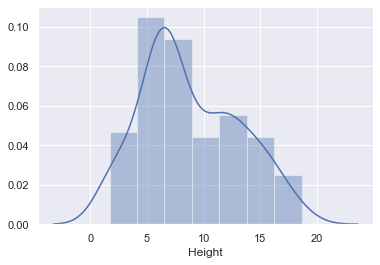

In [12]:
q = data_3['Height'].quantile(0.99)
data_4 = data_3[data_3['Height']<q]
sns.distplot(data_4["Height"])

<AxesSubplot:xlabel='Weight'>

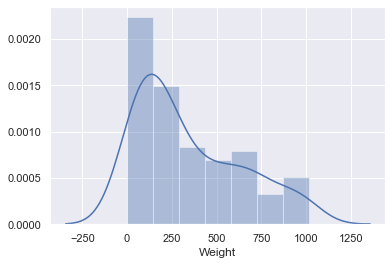

In [13]:
q = data_4['Weight'].quantile(0.99)
data_5 = data_4[data_4['Weight']<q]
sns.distplot(data_5["Weight"])

<AxesSubplot:xlabel='Width'>

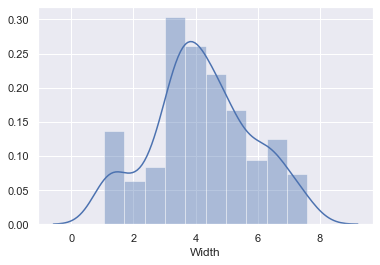

In [14]:
q = data_5['Width'].quantile(0.99)
data_6 = data_5[data_5['Width']<q]
sns.distplot(data_6["Width"])

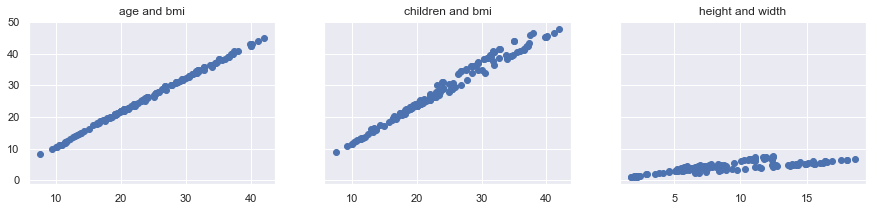

In [15]:
f, (ax1, ax2, ax3,) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'G3' as y
ax1.scatter(data_6['Length1'],data_6['Length2'])
ax1.set_title('age and bmi')
ax2.scatter(data_6['Length1'],data_6['Length3'])
ax2.set_title('children and bmi')
ax3.scatter(data_6['Height'],data_6['Width'])
ax3.set_title('height and width')
plt.show()

In [16]:
targets = data_6['Weight']
inputs = inputs = data_6.drop(['Weight'],axis=1)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [18]:
inputs_scaled = scaler.transform(inputs)
inputs_scaled

array([[-1.38156739e+00, -1.69642507e-01, -1.41743007e-01,
         6.02197183e-02,  6.56556291e-01, -1.24133468e-01],
       [-1.38156739e+00, -7.31288936e-02, -4.08490140e-02,
         1.81629323e-01,  8.82243852e-01,  5.61243674e-02],
       [-1.38156739e+00, -8.51930953e-02, -1.84281266e-02,
         1.71511856e-01,  8.58217531e-01,  3.02590350e-01],
       [-1.38156739e+00,  2.04347745e-01,  2.61832966e-01,
         4.14331065e-01,  9.41016655e-01,  1.50734485e-01],
       [-1.38156739e+00,  2.28476148e-01,  2.61832966e-01,
         4.64918401e-01,  8.73780569e-01,  5.78973074e-01],
       [-1.38156739e+00,  2.64668753e-01,  3.40306071e-01,
         5.35740670e-01,  1.14611023e+00,  4.48576475e-01],
       [-1.38156739e+00,  2.64668753e-01,  3.40306071e-01,
         5.15505736e-01,  1.28178136e+00,  6.70174955e-01],
       [-1.38156739e+00,  3.61182366e-01,  3.73937402e-01,
         5.66093071e-01,  9.26911182e-01,  2.98740305e-01],
       [-1.38156739e+00,  3.61182366e-01,  3.739

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.1, random_state=365)

In [20]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [21]:
y_hat = reg.predict(x_train)

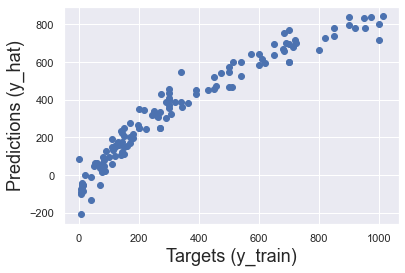

In [22]:
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.show()

In [23]:
reg.score(x_test,y_test)

0.9447581457674377

In [24]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Species,91.526952
1,Length1,792.287532
2,Length2,-1004.830187
3,Length3,239.563407
4,Height,160.323307
5,Width,153.878287


In [25]:
y_hat_test = reg.predict(x_test)

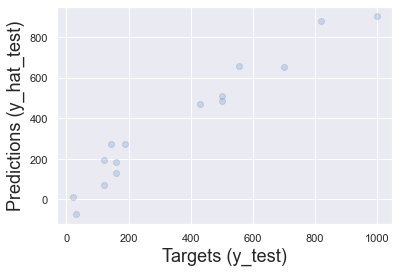

In [26]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()

In [27]:
df_pf = pd.DataFrame(y_hat_test, columns=['Prediction'])
df_pf.head()

,Prediction
0,183.858967
1,195.622528
2,484.600566
3,469.074446
4,902.519267


In [28]:
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0     161.0
1     120.0
2     500.0
3     430.0
4    1000.0
Name: Weight, dtype: float64

In [29]:
df_pf['Target'] = y_test
df_pf

,Prediction,Target
0,183.858967,161.0
1,195.622528,120.0
2,484.600566,500.0
3,469.074446,430.0
4,902.519267,1000.0
5,654.175807,700.0
6,11.612728,19.7
7,-72.457511,32.0
8,275.590332,145.0
9,70.080764,120.0


In [30]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,15.000000,15.000000,15.000000,15.000000
mean,375.251457,363.446667,-11.804790,46.470822
std,305.250078,306.260381,70.937480,81.485884
min,-72.457511,19.700000,-130.590332,2.092430
25%,157.304257,132.500000,-68.441751,8.278965
50%,275.590332,188.000000,-10.462150,18.086221
75%,582.318979,528.000000,37.537323,43.954442
max,902.519267,1000.000000,104.457511,326.429722


In [31]:
pd.options.display.max_rows = 999
# Display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
10,510.46,500.00,-10.46,2.09
2,484.60,500.00,15.40,3.08
5,654.18,700.00,45.82,6.55
13,881.26,820.00,-61.26,7.47
3,469.07,430.00,-39.07,9.09
4,902.52,1000.00,97.48,9.75
0,183.86,161.00,-22.86,14.20
11,656.56,556.00,-100.56,18.09
14,130.75,160.00,29.25,18.28
6,11.61,19.70,8.09,41.05


In [33]:
def fishdata(x):
    return raw_data.loc[x,:]
x = fishdata(0)
x

Species     0.00
Weight    242.00
Length1    23.20
Length2    25.40
Length3    30.00
Height     11.52
Width       4.02
Name: 0, dtype: float64